In [1]:
#BUILD BY 강연철 2021.04.01

#필요한 라이브러리를 불러옵니다.
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from pandas.io.parsers import read_csv
import xlrd

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
#요일별 데이터를 불러옵니다.
data = np.array(read_csv('UID1_TUE_OUT.csv',sep=','))

In [4]:
#날짜 데이터를 가져옵니다.
x_data = data[:, 5]

In [5]:
#시간 데이터를 가져옵니다.
y_data = data[:, 4]

In [6]:
#학습을 위해 랜덤값의 변수로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())

In [7]:
# 잔차의 제곱의 평균을 반환하는 함수입니다. 
def compute_loss(): 
  y_pred = a * x_data + b
  loss = tf.reduce_mean((y_data - y_pred) ** 2)
  return loss

optimizer = tf.optimizers.Adam(lr=0.07)

for i in range(1000): 
  # 잔차의 제곱의 평균을 최소화(minimize) 합니다. 
  optimizer.minimize(compute_loss, var_list=[a,b])

  if i % 100 == 0:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(x_data), max(x_data), 0.01)
line_y = a * line_x + b

0 a: 0.5666781 b: 0.88981456 loss: 634373100.0
100 a: 0.002419694 b: 0.3255561 loss: 11472.055
200 a: 1.5130812e-05 b: 0.3231516 loss: 0.053779554
300 a: 1.0000582e-05 b: 0.3231465 loss: 6.667854e-05
400 a: 9.9159215e-06 b: 0.32314634 loss: 5.2487605e-05
500 a: 9.915831e-06 b: 0.32314634 loss: 5.2487558e-05
600 a: 9.915828e-06 b: 0.32314634 loss: 5.2487583e-05
700 a: 9.915829e-06 b: 0.32314634 loss: 5.248755e-05
800 a: 9.915829e-06 b: 0.32314634 loss: 5.248755e-05
900 a: 9.915828e-06 b: 0.32314634 loss: 5.2487583e-05


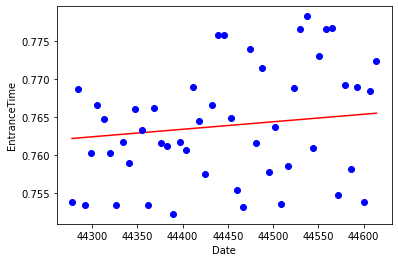

In [8]:
# 그래프를 그립니다. 
plt.plot(line_x, line_y, 'r-')
plt.plot(x_data, y_data, 'bo')
plt.xlabel('Date')
plt.ylabel('EntranceTime')
plt.show()

In [10]:
# 다음주의 예상 출/퇴근 시간을 예측합니다.
from datetime import time

prediction = a * 44621 + b
prediction = int(prediction * 24 * 3600)
my_time = time(prediction//3600, (prediction%3600)//60, prediction%60) # 시, 분, 초
print(my_time)

18:22:27
